In [0]:
# Import necessary modules 

%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [0]:
# Load your Boston data set into Google Colab

from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [0]:
# Load your data set into a Pandas DataFrame in Google Colab

import io
rawBostonData = pd.read_csv(io.BytesIO(uploaded['Boston.csv']))

In [0]:
# Check raw data set

rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [0]:
# Drop null values from raw data set

rawBostonData = rawBostonData.dropna()

In [0]:
# Drop duplicates from raw data set

rawBostonData = rawBostonData.drop_duplicates()

In [0]:
# list column headings in raw data set

list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [0]:
# Rename column headings in raw data set to meaningful ones

renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita',
 ' ZN ':'landOver25K_sqft',
 'INDUS ':'non-retailLandProptn',
 'CHAS':'riverDummy',
 'NOX':'nitrixOxide_pp10m',
 'RM':'avgNo.RoomsPerDwelling',
 'AGE':'proptnOwnerOccupied',
 'DIS':'weightedDist',
 'RAD':'radialHighwaysAccess',
 'TAX':'propTaxRate_per10K',
 'PTRATIO':'pupilTeacherRatio',
 'LSTAT':'pctLowerStatus',
 'MEDV':'medianValue_Ks'})

In [0]:
# Check renamed data set

renamedBostonData.head()

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,avgNo.RoomsPerDwelling,proptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [0]:
# Verify data set information

renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
crimeRatePerCapita        506 non-null float64
landOver25K_sqft          506 non-null float64
non-retailLandProptn      506 non-null float64
riverDummy                506 non-null int64
nitrixOxide_pp10m         506 non-null float64
avgNo.RoomsPerDwelling    506 non-null float64
proptnOwnerOccupied       506 non-null float64
weightedDist              506 non-null float64
radialHighwaysAccess      506 non-null int64
propTaxRate_per10K        506 non-null int64
pupilTeacherRatio         506 non-null float64
pctLowerStatus            506 non-null float64
medianValue_Ks            506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [0]:
# Output basic statistics for data set

renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
avgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
proptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [0]:
# Divide the data set into two

X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10 
test_data_size = 0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

In [0]:
train_data.corr(method = 'pearson')

,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,avgNo.RoomsPerDwelling,proptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
landOver25K_sqft,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,-0.435827,0.422574,-0.198455
non-retailLandProptn,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,0.607457,-0.508338,0.387471
riverDummy,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,-0.041110,0.136831,-0.044587
nitrixOxide_pp10m,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,0.603656,-0.453424,0.405813
avgNo.RoomsPerDwelling,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,-0.586573,0.666761,-0.167258
proptnOwnerOccupied,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,0.639881,-0.419062,0.355730
weightedDist,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,-0.522120,0.289658,-0.378997
radialHighwaysAccess,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,0.456592,-0.383132,0.608838
propTaxRate_per10K,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,0.528029,-0.478903,0.565035
pupilTeacherRatio,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,0.374842,-0.503692,0.276530


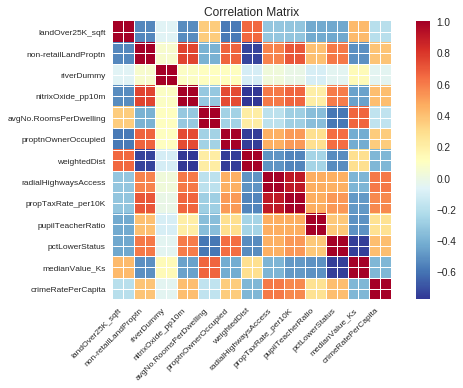

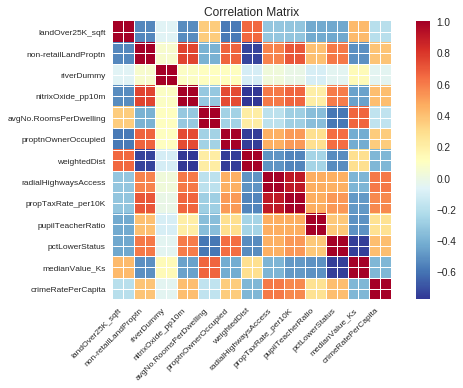

In [0]:
# Correlation matrix of train_data set

corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

In [0]:
# Isolate crime rate correlation values

corrMatrix['crimeRatePerCapita']

landOver25K_sqft         -0.198455
non-retailLandProptn      0.387471
riverDummy               -0.044587
nitrixOxide_pp10m         0.405813
avgNo.RoomsPerDwelling   -0.167258
proptnOwnerOccupied       0.355730
weightedDist             -0.378997
radialHighwaysAccess      0.608838
propTaxRate_per10K        0.565035
pupilTeacherRatio         0.276530
pctLowerStatus            0.406340
medianValue_Ks           -0.378949
crimeRatePerCapita        1.000000
Name: crimeRatePerCapita, dtype: float64

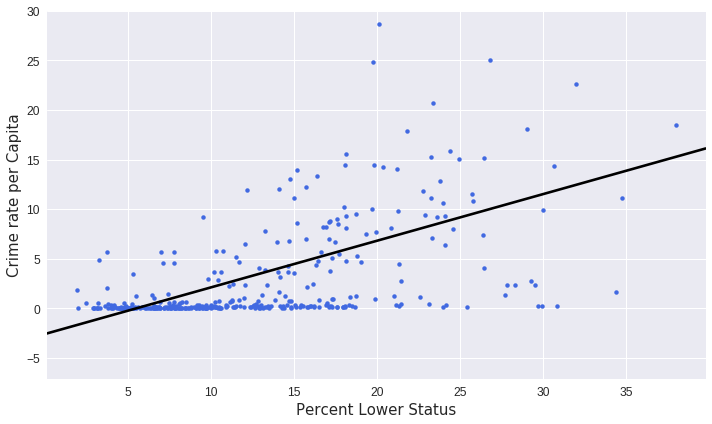

In [0]:
#Exercise 4 code

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='pctLowerStatus', y='crimeRatePerCapita', ci=None, data=train_data, ax=ax, color='k',\
            scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel('Percent Lower Status', fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

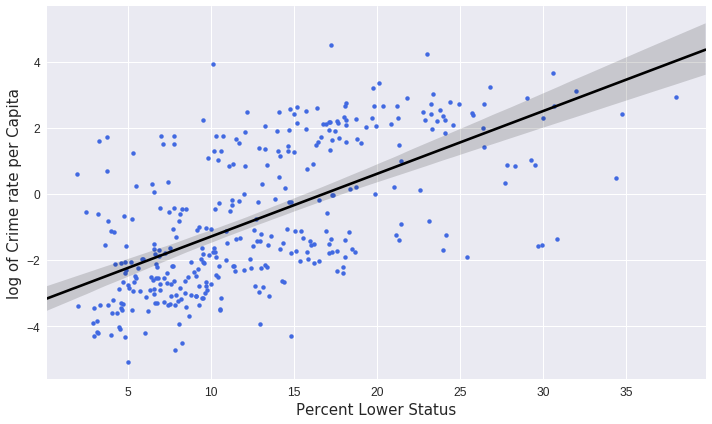

In [0]:
#Activity 1 code log linear

fig, ax = plt.subplots(figsize=(10, 6))
y=np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='pctLowerStatus', y=y, ci=95, data=train_data, ax=ax, color='k',\
            scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel('Percent Lower Status', fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

In [0]:
# Exercise 5 code

exx5Mod = smf.ols(formula='crimeRatePerCapita ~ pctLowerStatus', data=train_data)
exx5ModResult = exx5Mod.fit()
print(exx5ModResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     69.61
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           1.66e-15
Time:                        07:36:58   Log-Likelihood:                -1212.9
No. Observations:                 354   AIC:                             2430.
Df Residuals:                     352   BIC:                             2438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5864      0.832     -3.

In [0]:
# Activity 2 code

act2Mod = smf.ols(formula='np.log(crimeRatePerCapita) ~ pctLowerStatus',\
                  data=train_data)
act2ModResult = act2Mod.fit()
print(act2ModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.379
Model:                                    OLS   Adj. R-squared:                  0.377
Method:                         Least Squares   F-statistic:                     215.1
Date:                        Fri, 13 Sep 2019   Prob (F-statistic):           2.45e-38
Time:                                07:36:58   Log-Likelihood:                -691.35
No. Observations:                         354   AIC:                             1387.
Df Residuals:                             352   BIC:                             1394.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [0]:
# Exercise 6 code

exx6Mod = smf.ols(formula=\
'crimeRatePerCapita ~ pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m',\
data=train_data)
exx6ModResult = exx6Mod.fit()
print(exx6ModResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Fri, 13 Sep 2019   Prob (F-statistic):           2.19e-37
Time:                        07:36:58   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 

In [0]:
# Activity 3 code

act3Mod = smf.ols(formula=\
'np.log(crimeRatePerCapita) ~ \
(pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m)**2',\
data=train_data)
act3ModResult = act3Mod.fit()
print(act3ModResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.884
Model:                                    OLS   Adj. R-squared:                  0.881
Method:                         Least Squares   F-statistic:                     261.5
Date:                        Fri, 13 Sep 2019   Prob (F-statistic):          7.79e-154
Time:                                07:36:58   Log-Likelihood:                -394.39
No. Observations:                         354   AIC:                             810.8
Df Residuals:                             343   BIC:                             853.3
Df Model:                                  10                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

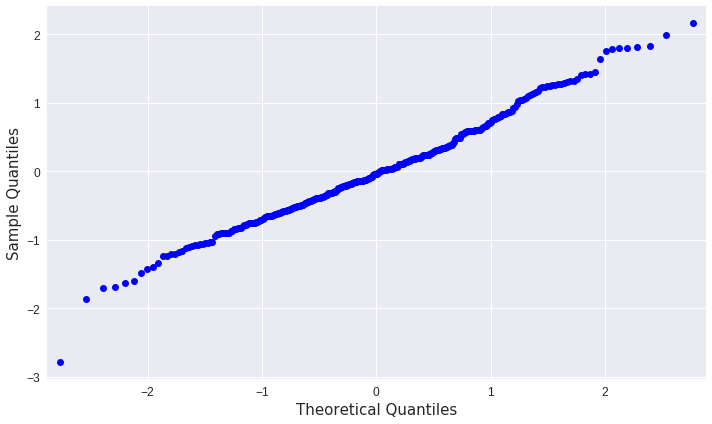

In [0]:
# Normality test code

fig, ax = plt.subplots(figsize=(10, 6))
smg.qqplot(act3ModResult.resid, ax=ax)
ax.set_ylabel('Sample Quantiles', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel('Theoretical Quantiles', fontsize=15, fontname='DejaVu Sans')
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

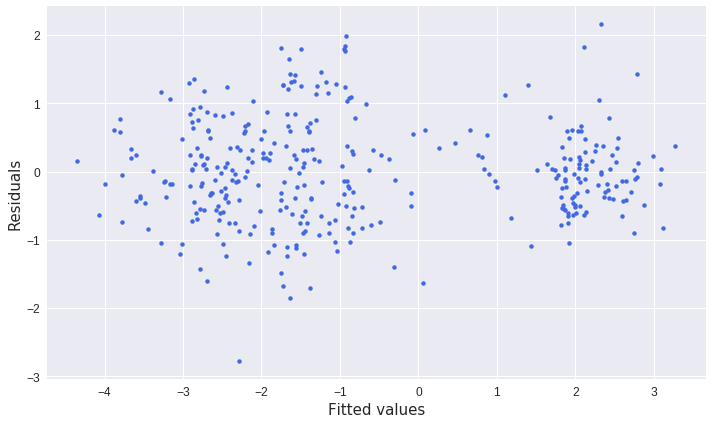

In [0]:
# Heteroskedasticity test code


x=act3ModResult.fittedvalues.values
y=act3ModResult.resid.values
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x=x, y=y, ci=None, data=train_data, ax=ax, color='k', fit_reg=False,\
            scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('Residuals', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel('Fitted values', fontsize=15, fontname='DejaVu Sans')
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

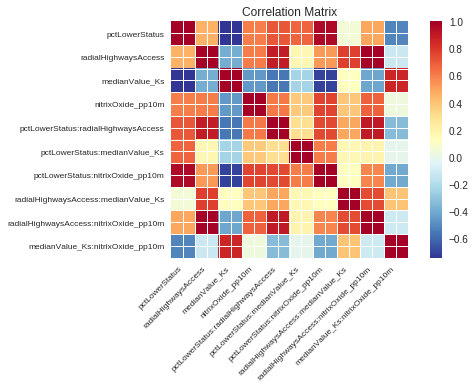

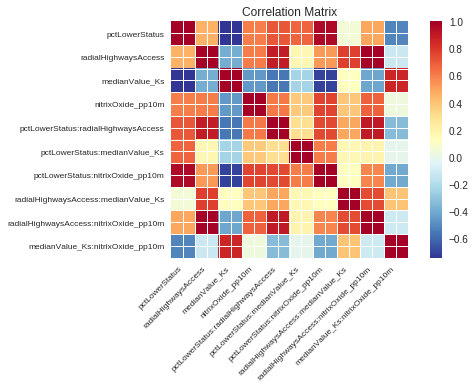

In [0]:
# Check for multicollinearity code

y, X = patsy.dmatrices\
('np.log(crimeRatePerCapita) ~ (pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m)**2-1',\
                       data=train_data, return_type='dataframe')
corrMatrix = X.corr(method = 'pearson')
xnames=list(X.columns)
ynames=list(X.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')